In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
packet_size = 1088

In [3]:
ndp_times = []
ndp_q_size = []

with open('./ndp-nanopu-simple-incast.qlen','r') as f:
    for line in f:
        time, q_size = line.split()
        ndp_times.append(float(time)/1000)
        ndp_q_size.append((float(q_size)+packet_size)/1000)

ndp_times = [ i - min(ndp_times) for i in ndp_times]
        
no_ndp_times = []
no_ndp_q_size = []

with open('./ndp-nanopu-simple-incast-without-trimming.qlen','r') as f:
    for line in f:
        time, q_size = line.split()
        no_ndp_times.append(float(time)/1000)
        no_ndp_q_size.append((float(q_size)+packet_size)/1000)
        
no_ndp_times = [ i - min(no_ndp_times) for i in no_ndp_times]

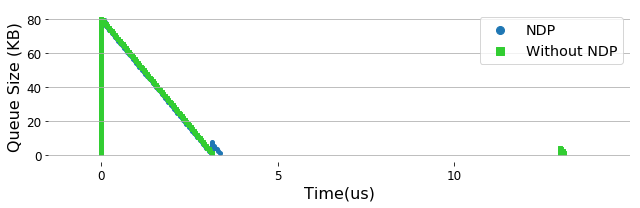

In [4]:
plt.figure(figsize=(9,3))

plt.scatter(ndp_times, ndp_q_size, 
         label='NDP', marker='o', s=16)
plt.scatter(no_ndp_times, no_ndp_q_size, 
            label='Without NDP', c='limegreen',
            marker='s', s=16)

plt.legend(fontsize="x-large", markerscale=2.0)
plt.xlabel('Time(us)', fontsize=16)
plt.ylabel('Queue Size (KB)', fontsize=16)

plt.grid(axis='y')
plt.xlim((-1.5,15))

plt.gca().get_xaxis().set_ticks([0,5,10])
plt.gca().get_yaxis().set_ticks([0,20,40,60,80])
plt.gca().tick_params(labelsize=12)

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tight_layout()
plt.savefig('ndp-nanopu-simple-incast-queue-size.png')
    
plt.show()